# **Lab 6: Differential equations**
**Fabián Levicán**

# **Abstract**

This is the sixth lab in the course DD2363 Methods in Scientific Computing. It is about using Jupyter to implement one method to approximate the solution to scalar IVPs and vector IVPs (systems of IVPs). The one we implement here is the explicit Euler method, a simple and well-known time-stepping method. Some objectives may be to become familiar with at least one numerical algorithm for solving simple ODEs, and to understand how this may be used in a variety of contexts and even solving more complicated ODEs or PDEs. The results of this method are then tested in various ways, and they are favorable.

#**About the code**

In [1]:
"""This program is a template for lab reports in the course"""
"""DD2363 Methods in Scientific Computing, """
"""KTH Royal Institute of Technology, Stockholm, Sweden."""

# Copyright (C) 2020 Fabián Levicán (fils2@kth.se)

# This file is part of the course DD2363 Methods in Scientific Computing
# KTH Royal Institute of Technology, Stockholm, Sweden
#
# This is free software: you can redistribute it and/or modify
# it under the terms of the GNU Lesser General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.

'KTH Royal Institute of Technology, Stockholm, Sweden.'

# **Set up environment**

In [0]:
# Load neccessary modules.
from google.colab import files

import math
import matplotlib.pyplot as plt
import time
import numpy as np

# **Introduction**

In scientific computing and various other contexts we often encounter IVPs or systems of IVPs. These are problems of the form $\frac{du}{dt}(t) = f(u(t), t), u(0) = u_0, 0 \leq t \leq T$. Here $u$ and $f$ can be maps into $\mathbb{R}$ (scalar case) or $\mathbb{R^n}$ (vector case).

To approximate the solution to these problems, the explicit Euler method is a time-stepping method that, given a partition $0 = t_0 < \ldots < t_n < \ldots < t_N = T$, calculates successive approximations $U_n \sim u(t_n)$, starting with $U_0 = u(0)$, and then setting $U_n = U_{n - 1} + k_nf(U_{n - 1}, t_{n - 1})$. Here $k_n = t_n - t_{n - 1}$.

To understand how perturbations (usually small) to the initial value affect the behavior of the solution for large values of $t$ we can calculate the equilibrium points of the model, which are the points $x^*$ where $f(x^*, t) = 0, \forall 0 \leq t \leq T$.

We can derive that in the scalar case the linear model $f = \lambda u$ displays stability around $x^* = 0$ when the real part of $\lambda$ is negative, instability when it's positive, and that the solution is constant or oscillatory when $\lambda$ is purely imaginary.

We can also derive that in the vector case the linear model $f = Au$ displays stability around $x^* = 0$ when $A$ is negative definite, instability when there exists an eigenvalue $\lambda$ of $A$ such that its real part is positive, and that the solution is oscillatory when all the eigenvalues of $A$ are purely imaginary.

Non-linear models can be linearized locally in both cases to yield an analogous stability analysis with the derivative or the Jacobian, but there are some caveats in the vector case.

The aforementioned derivations and further information can be found in the notes from the relevant lectures.

# **Methods**

The `EETimeStep` method takes as input:

* `func`, a function $f(u(t), t)$.
* `u0`, an initial value $u_0$.
* `N`, a number of sub-intervals such that $T = t_N$.
* `T`, a final time.

The method outputs a tuple `(U, U[N])` where `U` is a list such that `U[n]` is the approximate solution $U(t)$ evaluated at $t_n$ and `U[N]` is the approximate solution $U(t)$ evaluated at $t_N$.

This implementation suffices for the both the scalar and vector cases, as NumPy multiplication allows for `u0` to be a scalar or a vector, and for `func` to be a map that returns a scalar or a vector.

Here we also print examples of `U[N]` for both the scalar and vector cases, the correctness of which was verified with *Wolfram Alpha*.

In [3]:
def EETimeStep(func, u0, N, T):
  k = T/N
  U = [u0]
  for n in range(N):
    U.append(
      U[n] + k*func(U[n], n*k)
    )
  return (U, U[N])

# Scalar example
# f(u(t), t) = -2u(t) + 3t + 5, f(0) = 1, N = 2500, T = 25
print(EETimeStep(lambda u, t: -2*u+3*t+5, 1, 2500, 25)[1])

# Vector example
# f(u(t), t) = (-2u_1 + 3t + 5, -2u_1, -2u_3 + 15)^T, N = 2500, T = 25
print(EETimeStep(lambda u, t: np.array([-2*u[0]+3*t+5, -2*u[0], -2*u[2]+15]), np.array([1, 1, 1]), 2500, 25)[1])


39.25000000000014
[   39.25  -1022.875     7.5  ]


# **Results**

For the scalar case I chose the model $\frac{du}{dt}(t) = -3u(t), u(0) = u_0, 0 \leq t \leq 25$. Here $N = 2500$ and $u_0$ is one of $-25, 0, 1, 100$.

The exact solutions for these IVPs are $u(t) = u_0e^{-3t}$. The accuracy of my `EETimeStep` method is verified graphically in the four plots, and the stability with respect to this linear model is verified as the approximations $U(t)$ clearly approach $0$ in the four plots (and, thus, for the four distinct initial values $u_0$).

The reader may want to remember that this linear model has an unique equilibrium point at $x^* = 0$ that is stable since $-3 = \lambda < 0$.

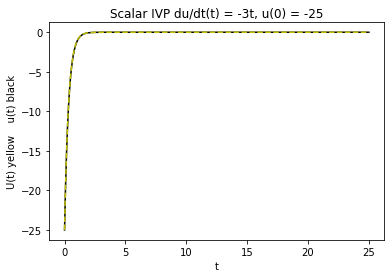

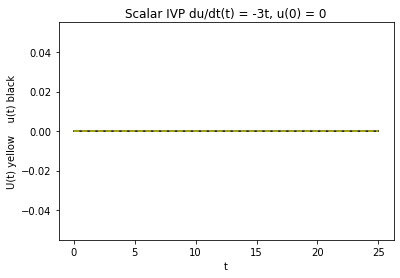

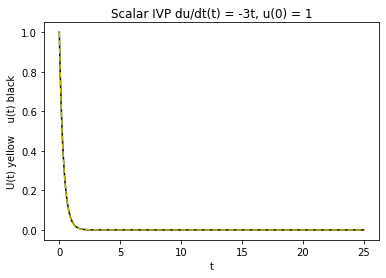

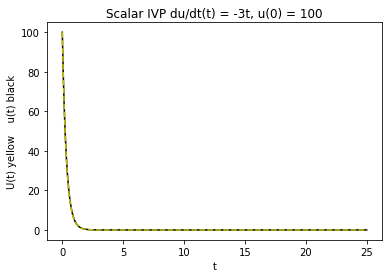

In [4]:
# Tests for the scalar case

# u0 = -25
xAxis = [0.01*n for n in range(2501)]
yAxisExact = [-25*math.exp(-3*0.01*n) for n in range(2501)]
yAxisApprox = EETimeStep(lambda u, t: -3*u, -25, 2500, 25)[0]
plt.plot(xAxis, yAxisExact, 'k-')
plt.plot(xAxis, yAxisApprox, 'y--')
plt.xlabel('t')
plt.ylabel('U(t) yellow    u(t) black')
plt.title('Scalar IVP du/dt(t) = -3t, u(0) = -25')
plt.show()

# u0 = 0
yAxisExact = [0*math.exp(-3*0.01*n) for n in range(2501)]
yAxisApprox = EETimeStep(lambda u, t: -3*u, 0, 2500, 25)[0]
plt.plot(xAxis, yAxisExact, 'k-')
plt.plot(xAxis, yAxisApprox, 'y--')
plt.xlabel('t')
plt.ylabel('U(t) yellow    u(t) black')
plt.title('Scalar IVP du/dt(t) = -3t, u(0) = 0')
plt.show()

# u0 = 1
yAxisExact = [1*math.exp(-3*0.01*n) for n in range(2501)]
yAxisApprox = EETimeStep(lambda u, t: -3*u, 1, 2500, 25)[0]
plt.plot(xAxis, yAxisExact, 'k-')
plt.plot(xAxis, yAxisApprox, 'y--')
plt.xlabel('t')
plt.ylabel('U(t) yellow    u(t) black')
plt.title('Scalar IVP du/dt(t) = -3t, u(0) = 1')
plt.show()

# u0 = 100
yAxisExact = [100*math.exp(-3*0.01*n) for n in range(2501)]
yAxisApprox = EETimeStep(lambda u, t: -3*u, 100, 2500, 25)[0]
plt.plot(xAxis, yAxisExact, 'k-')
plt.plot(xAxis, yAxisApprox, 'y--')
plt.xlabel('t')
plt.ylabel('U(t) yellow    u(t) black')
plt.title('Scalar IVP du/dt(t) = -3t, u(0) = 100')
plt.show()

For the vector case (the system case) I chose the model $\frac{du}{dt}(t) = Au := \left ( \begin{array}{ccc}
-2 & 0 & 1 \\
0 & -1 & 0 \\
1 & 0 & -2
\end{array} \right )u, u(0) = u_0, 0 \leq t \leq T$. Here $N = 2500$.

For the accuracy tests I chose $u_0 = (2, 2, 2)^T$ and $T = 25$. The exact solution for this value of $u_0$ is $u(t) = \left ( \begin{array}{c}
e^{-3t}(e^{2t}+1)+e^{-3t}(e^{2t} - 1) \\
2e^{-t} \\
e^{-3t}(e^{2t}+1)+e^{-3t}(e^{2t} - 1)
\end{array} \right )$. The correctness of this exact solution was verified with *Wolfram Alpha*.

The accuracy of my `EETimeStep` method is verified by defining `error(t)` at the points $t = t_n$ as $\|u(t_n) - U(t_n)\|$, and plotting the graph `error(t) vs. t`. The largest error, which is around $0.0065$, is found at around $t = 2$, and the error is usually very, very small. Thus, the method is accurate.

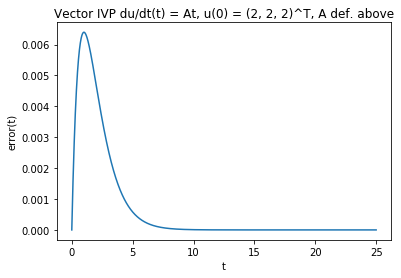

In [5]:
# Tests for the vector case

# Accuracy

exactEval = np.array([[
  math.exp(-3*xAxis[n])*(math.exp(2*xAxis[n])+1)+math.exp(-3*xAxis[n])*(math.exp(2*xAxis[n])-1),
  2*math.exp(-xAxis[n]),
  math.exp(-3*xAxis[n])*(math.exp(2*xAxis[n])+1)+math.exp(-3*xAxis[n])*(math.exp(2*xAxis[n])-1)
] for n in range (2501)])
approxEval = np.array(EETimeStep(lambda u, t: np.array([-2*u[0]+u[2], -u[1], u[0]-2*u[2]]), np.array([2, 2, 2]), 2500, 25)[0])
error = [np.linalg.norm(exactEval[n] - approxEval[n]) for n in range(2501)]
plt.plot(xAxis, error)
plt.xlabel('t')
plt.ylabel('error(t)')
plt.title('Vector IVP du/dt(t) = At, u(0) = (2, 2, 2)^T, A def. above')
plt.show()

For the stability tests I chose the model above, $u_0$ as one of $(-25, -25, -25)^T, (0, 0, 0)^T, (2, 2, 2)^T, (100, 100, 100)^T$, and $T = 50$ (the latter to better display the behavior of the approximation at larger values of $t$).

The stability of my `EETimeStep` method with respect to the model above is verified by asserting that $U(t_N)$ is close to the zero vector for any choice of the initial value $u_0$.

The reader may want to remember that this linear model has an unique equilibrium point at $x^* = 0$ that is stable since $A$ is negative definite. Indeed, the eigenvalues of $A$ are $-3, -1$ and $-1$. The correctness of this statement was verified with *Wolfram Alpha*.

In [6]:
# Tests for the vector case

# Stability

assert(
  np.linalg.norm(EETimeStep(lambda u, t: np.array([-2*u[0]+u[2], -u[1], u[0]-2*u[2]]), np.array([-25, -25, -25]), 2500, 50)[1]) < 0.0001
)
assert(
  np.linalg.norm(EETimeStep(lambda u, t: np.array([-2*u[0]+u[2], -u[1], u[0]-2*u[2]]), np.array([0, 0, 0]), 2500, 50)[1]) < 0.0001
)
assert(
  np.linalg.norm(EETimeStep(lambda u, t: np.array([-2*u[0]+u[2], -u[1], u[0]-2*u[2]]), np.array([2, 2, 2]), 2500, 50)[1]) < 0.0001
)
assert(
  np.linalg.norm(EETimeStep(lambda u, t: np.array([-2*u[0]+u[2], -u[1], u[0]-2*u[2]]), np.array([100, 100, 100]), 2500, 50)[1]) < 0.0001
)
print("All stability tests pass successfully!")

All stability tests pass successfully!


# **Discussion**

All the results were favorable.

The author doesn't know why the error at around $t = 2$ is maximal (although it continues to be very small), but he would like to investigate the matter further. He also believes that the `error(t) vs. t` graph resembles that of the density function of some probabilistic distribution.

The author found the simplicity and wide applicability of the explicit Euler method very interesting.

While writing this report the author collaborated with Felipe Vicencio, and relied heavily on the lecture notes.